# Libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from adjustText import adjust_text 

# Data wrangling

In [19]:
# Gathering data
dtype_dict = {
    "Mediennummer": "string",
    "Sigel": "string",
    "Fachst_1": "string",
    "Fachst_2": "string",
    "Aufstellung": "string",
    "MTC": "string",
    "Physikalische_Form": "string",
    "Sachgr.": "string",
    "StO": "string",
    "Erwerbungsart": "string",
    "Ausleihen": "int64",
    "Verlängerungen": "int64",
    "Anzahl_Exemplare": "int64",
    "Sum_Ausl": "int64"
}

BesEx_2022_cleaned_df = pd.read_csv(
    "BesEx_2022_cleaned.csv",
    dtype=dtype_dict,
    parse_dates=["Inventarisierung"]  # pour forcer la colonne en datetime
)

BesEx_2022_cleaned_df.dtypes


Mediennummer          string[python]
Sigel                 string[python]
Fachst_1              string[python]
Fachst_2              string[python]
Aufstellung           string[python]
MTC                   string[python]
Physikalische_Form    string[python]
Sachgr.               string[python]
Preis                        float64
StO                   string[python]
Inventarisierung      datetime64[ns]
Ausleihen                      int64
Verlängerungen                 int64
Erwerbungsart         string[python]
Anzahl_Exemplare               int64
Sum_Ausl                       int64
dtype: object

In [20]:
# Gathering data
dtype_dict = {
    "Mediennummer": "string",
    "Sigel": "string",
    "Fachst_1": "string",
    "Fachst_2": "string",
    "Aufstellung": "string",
    "MTC": "string",
    "Physikalische_Form": "string",
    "Sachgr.": "string",
    "StO": "string",
    "Erwerbungsart": "string",
    "Ausleihen": "int64",
    "Verlängerungen": "int64",
    "Anzahl_Exemplare": "int64",
    "Sum_Ausl": "int64"
}

BesEx_2024_cleaned_df = pd.read_csv(
    "BesEx_2024_cleaned.csv",
    dtype=dtype_dict,
    parse_dates=["Inventarisierung"]  # pour forcer la colonne en datetime
)

BesEx_2024_cleaned_df.dtypes


Mediennummer          string[python]
Sigel                 string[python]
Fachst_1              string[python]
Fachst_2              string[python]
Aufstellung           string[python]
MTC                   string[python]
Physikalische_Form    string[python]
Sachgr.               string[python]
Preis                        float64
StO                   string[python]
Inventarisierung      datetime64[ns]
Ausleihen                      int64
Verlängerungen                 int64
Erwerbungsart         string[python]
Anzahl_Exemplare               int64
Sum_Ausl                       int64
dtype: object

# Create columns Ausl_Jahr

In [21]:
BesEx_2022_cleaned_df["Ausl_Jahr"] = 2022
BesEx_2024_cleaned_df["Ausl_Jahr"] = 2024

# Create dataframe BesEx_2022_2024

In [22]:
#concatenated = pandas.concat([df1, df2])
BesEx_2022_2024_df = pd.concat([BesEx_2022_cleaned_df, BesEx_2024_cleaned_df])
BesEx_2022_2024_df

,Mediennummer,Sigel,Fachst_1,Fachst_2,Aufstellung,MTC,Physikalische_Form,Sachgr.,Preis,StO,Inventarisierung,Ausleihen,Verlängerungen,Erwerbungsart,Anzahl_Exemplare,Sum_Ausl,Ausl_Jahr
0,0,477,SA,E,<NA>,11,0n,Terr,NaN,<NA>,NaT,0,0,<NA>,1,0,2022
1,477,477,SA,E,LESE,11,0n,Terr,NaN,<NA>,NaT,0,0,<NA>,1,0,2022
2,13477,477,SA,E,LESE,11,0n,Terr,NaN,<NA>,NaT,0,0,<NA>,1,0,2022
3,26477,477,SA,E,Raum0,11,0n,Terr,NaN,<NA>,NaT,0,0,<NA>,1,0,2022
4,39477,477,SA,E,Raum0,11,0n,Terr,NaN,<NA>,NaT,0,0,<NA>,1,0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330974,7018969457,975,SL,K,Fran,1,0n,1.1,18.5,<NA>,2024-08-12,1,0,K,1,1,2024
330975,7018972457,975,SL,K,Fran,1,0n,1.1,15.5,<NA>,2024-08-12,2,1,K,1,3,2024
330976,7018985457,975,SL,K,Fran,1,0n,2.1,15.5,<NA>,2024-08-12,3,1,K,1,4,2024
330977,7018998457,975,SL,E,Rus,1,0n,Roman,15.0,<NA>,2024-08-12,3,0,K,1,3,2024


In [23]:
BesEx_2022_2024_df.dtypes

Mediennummer          string[python]
Sigel                 string[python]
Fachst_1              string[python]
Fachst_2              string[python]
Aufstellung           string[python]
MTC                   string[python]
Physikalische_Form    string[python]
Sachgr.               string[python]
Preis                        float64
StO                   string[python]
Inventarisierung      datetime64[ns]
Ausleihen                      int64
Verlängerungen                 int64
Erwerbungsart         string[python]
Anzahl_Exemplare               int64
Sum_Ausl                       int64
Ausl_Jahr                      int64
dtype: object

In [24]:
# Dictionnaire de correspondance
mtc_mapping = {
    1: "Buch",
    4: "CD",
    6: "konventionelles Spiel",
    7: "Software",
    8: "Zeitschrift",
    9: "Nicht bestellbar",
    10: "Nicht entleihbar",
    11: "Nicht entleihbar, auch keine Sonderleihe",
    12: "verkürzte Leihfrist",
    13: "Medienkombination",
    14: "???",
    15: "Mobiles Endgerät",
    17: "Noten",
    34: "DVD",
    38: "Konsolenspiel",
    58: "nur vor Ort entleihbar"
}

# Appliquer la transformation
BesEx_2022_2024_df['MTC'] = BesEx_2022_2024_df['MTC'].astype(int)
BesEx_2022_2024_df['MTC'] = BesEx_2022_2024_df['MTC'].replace(mtc_mapping)


In [25]:
BesEx_2022_2024_df

,Mediennummer,Sigel,Fachst_1,Fachst_2,Aufstellung,MTC,Physikalische_Form,Sachgr.,Preis,StO,Inventarisierung,Ausleihen,Verlängerungen,Erwerbungsart,Anzahl_Exemplare,Sum_Ausl,Ausl_Jahr
0,0,477,SA,E,<NA>,"Nicht entleihbar, auch keine Sonderleihe",0n,Terr,NaN,<NA>,NaT,0,0,<NA>,1,0,2022
1,477,477,SA,E,LESE,"Nicht entleihbar, auch keine Sonderleihe",0n,Terr,NaN,<NA>,NaT,0,0,<NA>,1,0,2022
2,13477,477,SA,E,LESE,"Nicht entleihbar, auch keine Sonderleihe",0n,Terr,NaN,<NA>,NaT,0,0,<NA>,1,0,2022
3,26477,477,SA,E,Raum0,"Nicht entleihbar, auch keine Sonderleihe",0n,Terr,NaN,<NA>,NaT,0,0,<NA>,1,0,2022
4,39477,477,SA,E,Raum0,"Nicht entleihbar, auch keine Sonderleihe",0n,Terr,NaN,<NA>,NaT,0,0,<NA>,1,0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330974,7018969457,975,SL,K,Fran,Buch,0n,1.1,18.5,<NA>,2024-08-12,1,0,K,1,1,2024
330975,7018972457,975,SL,K,Fran,Buch,0n,1.1,15.5,<NA>,2024-08-12,2,1,K,1,3,2024
330976,7018985457,975,SL,K,Fran,Buch,0n,2.1,15.5,<NA>,2024-08-12,3,1,K,1,4,2024
330977,7018998457,975,SL,E,Rus,Buch,0n,Roman,15.0,<NA>,2024-08-12,3,0,K,1,3,2024


In [26]:
BesEx_2022_2024_df.dtypes

Mediennummer          string[python]
Sigel                 string[python]
Fachst_1              string[python]
Fachst_2              string[python]
Aufstellung           string[python]
MTC                           object
Physikalische_Form    string[python]
Sachgr.               string[python]
Preis                        float64
StO                   string[python]
Inventarisierung      datetime64[ns]
Ausleihen                      int64
Verlängerungen                 int64
Erwerbungsart         string[python]
Anzahl_Exemplare               int64
Sum_Ausl                       int64
Ausl_Jahr                      int64
dtype: object

In [27]:
# comptabiliser les valeurs uniques
BesEx_2022_2024_df.nunique()

Mediennummer          417325
Sigel                      9
Fachst_1                   4
Fachst_2                   2
Aufstellung              267
MTC                       16
Physikalische_Form        28
Sachgr.                  228
Preis                   2134
StO                        1
Inventarisierung        6394
Ausleihen                 55
Verlängerungen            32
Erwerbungsart              9
Anzahl_Exemplare           1
Sum_Ausl                  58
Ausl_Jahr                  2
dtype: int64

# Export as .csv

In [33]:
# Exporter la DataFrame en CSV
BesEx_2022_2024_df.to_csv("BesEx_2022_2024_2.csv", index=False, encoding="utf-8")

# Exploratory Data Analysis (EDA) 

# KPI (Key Performance indicators): collection management

Entwicklung 2022-2024: Subplot Adults/Children Linien Plot for media typ: siehe Comet in Tableau. 
Umsatz 2022-2024 nach MTC: siehe Comet in Tableau

In [34]:
mtc_list = ["Buch", "CD", "konventionelles Spiel", "Software", "Zeitschrift", "Medienkombination", "Mobiles Endgerät", "Noten", "DVD", "Konsolenspiel"]

# Filtrer les MTC souhaités
df_mtc = BesEx_2022_2024_df[BesEx_2022_2024_df['MTC'].isin(mtc_list)]

# Fonction pour calculer le pourcentage
def pct_with_loans(group):
    with_loan = group.loc[group['Sum_Ausl'] >= 1, 'Anzahl_Exemplare'].sum()
    total = group['Anzahl_Exemplare'].sum()
    return with_loan / total * 100 if total > 0 else 0

# Calcul par MTC, année et Fachst_2
pct_per_mtc_year_fachst = (
    df_mtc
    .groupby(['Ausl_Jahr','Fachst_2','MTC'])
    .apply(pct_with_loans)
    .reset_index(name='Pct_Exemplare_mit_1Ausl')
)

# Arrondir sans décimales
pct_per_mtc_year_fachst['Pct_Exemplare_mit_1Ausl'] = pct_per_mtc_year_fachst['Pct_Exemplare_mit_1Ausl'].round(0)

# Pivot : MTC en lignes, colonnes = combinaison (année, Fachst_2)
pct_pivot = pct_per_mtc_year_fachst.pivot(index='MTC',
                                          columns=['Ausl_Jahr','Fachst_2'],
                                          values='Pct_Exemplare_mit_1Ausl')

# Aplatir les noms de colonnes (2022_E, 2024_E, 2022_K, 2024_K)
pct_pivot.columns = [f"{jahr}_{fach}" for jahr, fach in pct_pivot.columns]
pct_pivot = pct_pivot.reset_index()

print(pct_pivot)


                     MTC  2022_E  2022_K  2024_E  2024_K
0                   Buch    57.0    81.0    67.0    85.0
1                     CD    63.0    86.0    62.0    87.0
2                    DVD    79.0    83.0    82.0    83.0
3          Konsolenspiel    77.0    89.0    88.0    93.0
4      Medienkombination    57.0    64.0    61.0    66.0
5       Mobiles Endgerät    88.0    98.0    90.0    89.0
6                  Noten    72.0    50.0    72.0    63.0
7               Software    19.0    74.0    17.0    67.0
8            Zeitschrift    33.0    82.0    72.0    81.0
9  konventionelles Spiel    80.0    90.0    78.0    94.0


/var/folders/_w/syp13sn960j6v43pwrmhdn2r0000gp/T/ipykernel_5923/4029175299.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(pct_with_loans)


/var/folders/_w/syp13sn960j6v43pwrmhdn2r0000gp/T/ipykernel_5923/3658906904.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(df_erw["MTC"].unique(), rotation=30)
/var/folders/_w/syp13sn960j6v43pwrmhdn2r0000gp/T/ipykernel_5923/3658906904.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(df_kind["MTC"].unique(), rotation=30)


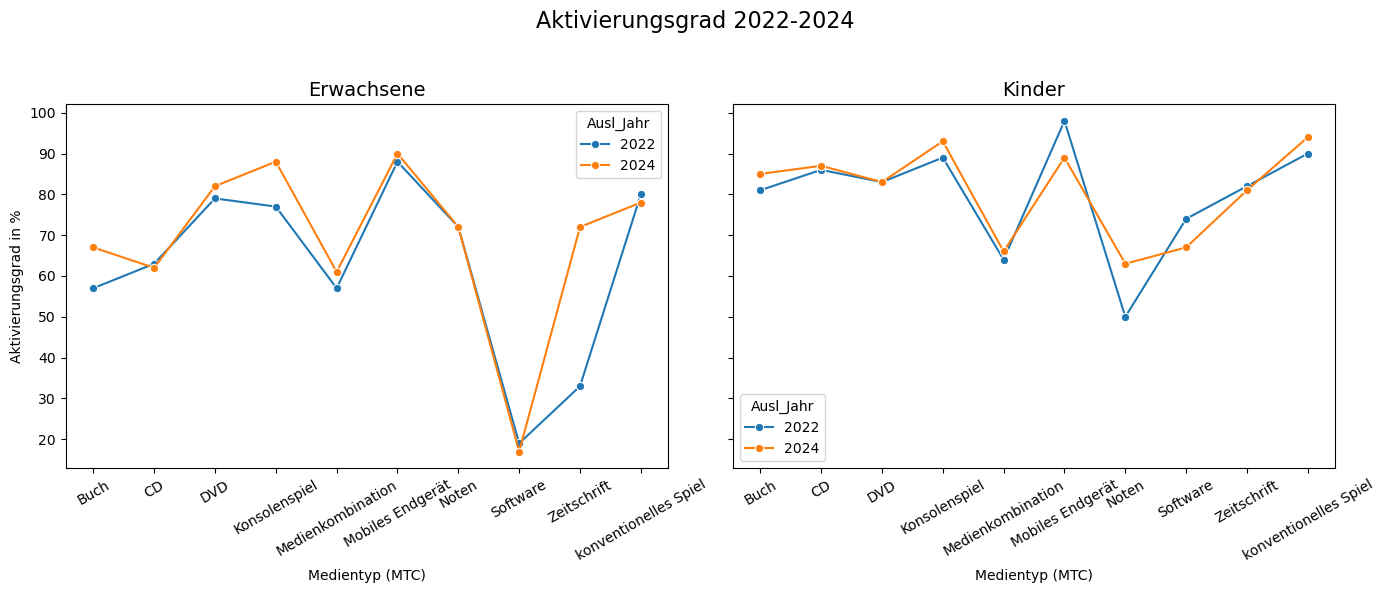

In [36]:
# Palette de couleurs personnalisée (ajuste si besoin)
custom_palette = {
    2022: "#1f77b4",   # bleu doux
    2024: "#ff7f0e"    # orange pas trop intense
}

# Séparer adultes (E) et enfants (K)
df_erw = pct_per_mtc_year_fachst[pct_per_mtc_year_fachst['Fachst_2'] == "E"]
df_kind = pct_per_mtc_year_fachst[pct_per_mtc_year_fachst['Fachst_2'] == "K"]

# Préparer les subplots
fig, axes = plt.subplots(ncols=2, figsize=(14,6), sharey=True)

# Erwachsene
sns.lineplot(
    data=df_erw,
    x="MTC", y="Pct_Exemplare_mit_1Ausl",
    hue="Ausl_Jahr", marker="o", ax=axes[0],
    palette=custom_palette
)
axes[0].set_title("Erwachsene", fontsize=14)
axes[0].set_xlabel("Medientyp (MTC)")
axes[0].set_ylabel("Aktivierungsgrad in %")
axes[0].set_xticklabels(df_erw["MTC"].unique(), rotation=30)

# Kinder
sns.lineplot(
    data=df_kind,
    x="MTC", y="Pct_Exemplare_mit_1Ausl",
    hue="Ausl_Jahr", marker="o", ax=axes[1],
    palette=custom_palette
)
axes[1].set_title("Kinder", fontsize=14)
axes[1].set_xlabel("Medientyp (MTC)")
axes[1].set_ylabel("")
axes[1].set_xticklabels(df_kind["MTC"].unique(), rotation=30)

# Gemeinsamer Titel
fig.suptitle("Aktivierungsgrad 2022-2024", fontsize=16)

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


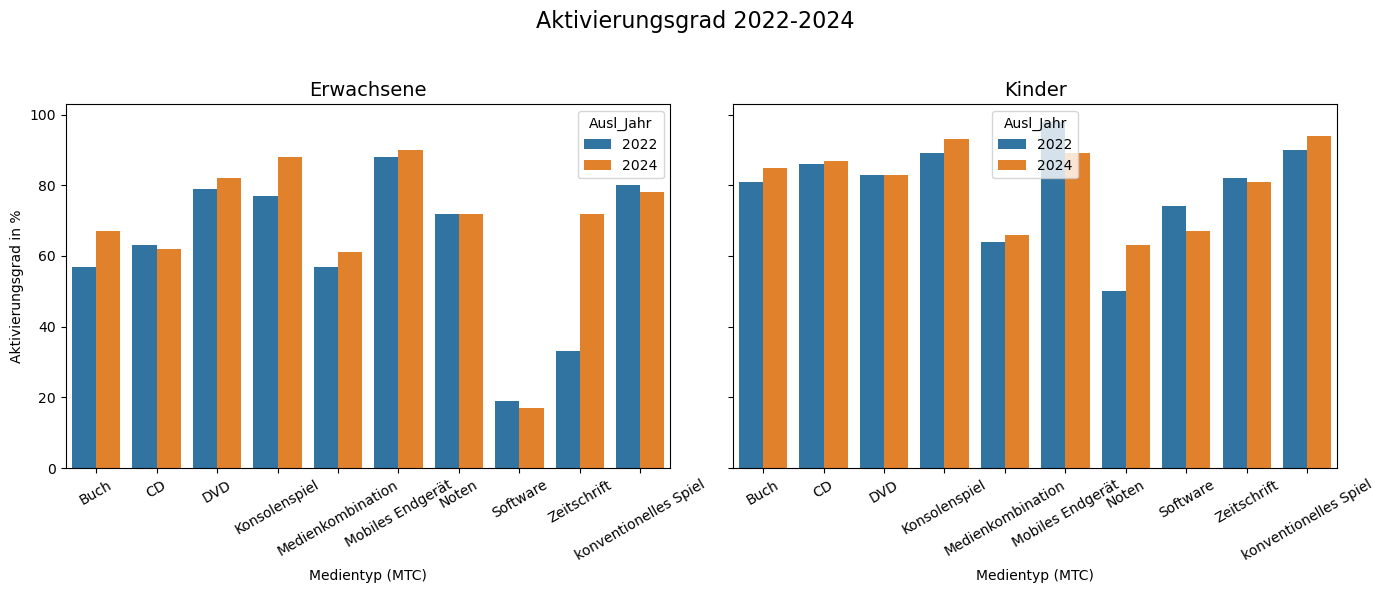

In [37]:
# Palette de couleurs personnalisée
custom_palette = {
    2022: "#1f77b4",   # bleu doux
    2024: "#ff7f0e"    # orange pas trop intense
}

# Séparer adultes (E) et enfants (K)
df_erw = pct_per_mtc_year_fachst[pct_per_mtc_year_fachst['Fachst_2'] == "E"]
df_kind = pct_per_mtc_year_fachst[pct_per_mtc_year_fachst['Fachst_2'] == "K"]

# Préparer les subplots
fig, axes = plt.subplots(ncols=2, figsize=(14,6), sharey=True)

# Erwachsene
sns.barplot(
    data=df_erw,
    x="MTC", y="Pct_Exemplare_mit_1Ausl",
    hue="Ausl_Jahr", ax=axes[0],
    palette=custom_palette
)
axes[0].set_title("Erwachsene", fontsize=14)
axes[0].set_xlabel("Medientyp (MTC)")
axes[0].set_ylabel("Aktivierungsgrad in %")
axes[0].tick_params(axis='x', rotation=30)

# Kinder
sns.barplot(
    data=df_kind,
    x="MTC", y="Pct_Exemplare_mit_1Ausl",
    hue="Ausl_Jahr", ax=axes[1],
    palette=custom_palette
)
axes[1].set_title("Kinder", fontsize=14)
axes[1].set_xlabel("Medientyp (MTC)")
axes[1].set_ylabel("")
axes[1].tick_params(axis='x', rotation=30)

# Gemeinsamer Titel
fig.suptitle("Aktivierungsgrad 2022-2024", fontsize=16)

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


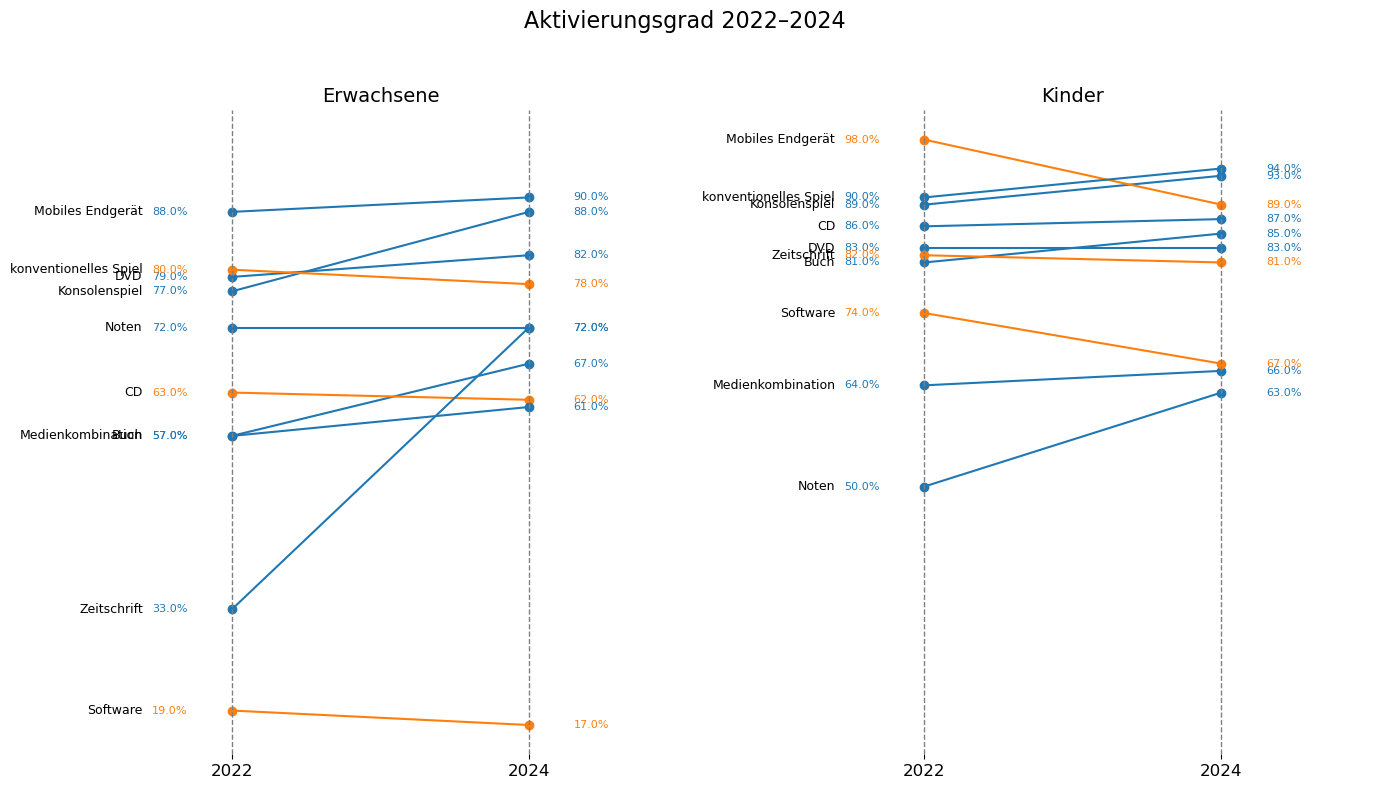

In [38]:
# Séparer adultes (E) et enfants (K)
df_erw = pct_per_mtc_year_fachst[pct_per_mtc_year_fachst['Fachst_2'] == "E"]
df_kind = pct_per_mtc_year_fachst[pct_per_mtc_year_fachst['Fachst_2'] == "K"]

def slopegraph(df, ax, title):
    # Pivot pour avoir colonnes = années, index = MTC
    df_pivot = df.pivot(index="MTC", columns="Ausl_Jahr", values="Pct_Exemplare_mit_1Ausl")
    df_pivot = df_pivot[[2022, 2024]]

    for mtc, row in df_pivot.iterrows():
        # couleur selon évolution
        color = "#1f77b4" if row[2024] >= row[2022] else "#ff7f0e"
        
        # tracer la ligne
        ax.plot([2022, 2024], row.values, marker="o", color=color)
        
        # valeurs %
        ax.text(2022-0.3, row[2022], f"{row[2022]:.1f}%", ha="right", va="center", fontsize=8, color=color)
        ax.text(2024+0.3, row[2024], f"{row[2024]:.1f}%", ha="left", va="center", fontsize=8, color=color)
        
        # MTC côté 2022
        ax.text(2022-0.6, row[2022], mtc, ha="right", va="center", fontsize=9, color="black")

    # enlever cadre
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    # lignes verticales 2022 et 2024
    ax.axvline(x=2022, color="grey", linestyle="--", linewidth=1)
    ax.axvline(x=2024, color="grey", linestyle="--", linewidth=1)
    
    # axe X élargi pour éviter chevauchement
    ax.set_xlim(2021, 2025)
    ax.set_xticks([2022, 2024])
    ax.set_xticklabels([2022, 2024], fontsize=12)
    
    # pas de ticks Y
    ax.set_yticks([])
    ax.set_ylabel("")
    
    ax.set_title(title, fontsize=14)

# Préparer subplots
fig, axes = plt.subplots(ncols=2, figsize=(14,8), sharey=True)

slopegraph(df_erw, axes[0], "Erwachsene")
slopegraph(df_kind, axes[1], "Kinder")

fig.suptitle("Aktivierungsgrad 2022–2024", fontsize=16)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

# The end